<a href="https://colab.research.google.com/github/KCY132/HW/blob/main/0530_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

테스트셋 정확도: 1.000


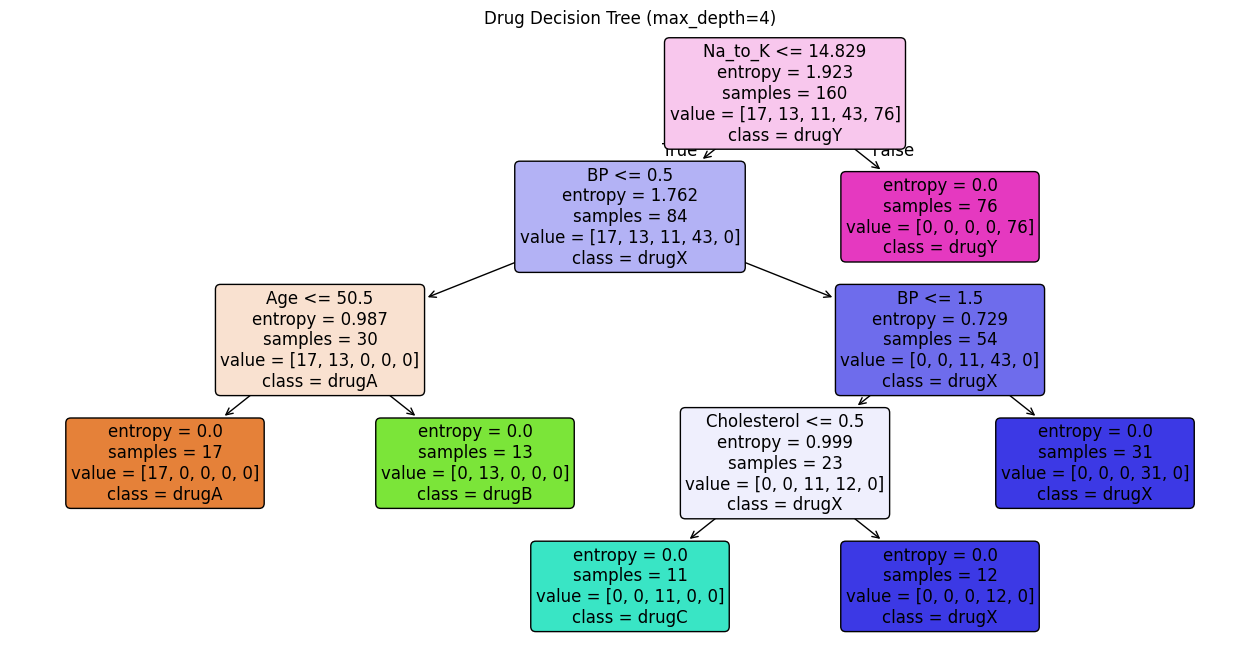

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('/content/drug200.csv')

# 2. 문자형 변수 라벨 인코딩
le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()
le_drug = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])
df['BP'] = le_bp.fit_transform(df['BP'])
df['Cholesterol'] = le_chol.fit_transform(df['Cholesterol'])
df['Drug'] = le_drug.fit_transform(df['Drug'])

# 3. 특성/타겟 분리
X = df.drop('Drug', axis=1)
y = df['Drug']

# 4. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. 의사결정트리 학습
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
clf.fit(X_train, y_train)

# 6. 예측 및 평가
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'테스트셋 정확도: {acc:.3f}')

# 7. 트리 시각화
plt.figure(figsize=(16,8))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=le_drug.classes_,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Drug Decision Tree (max_depth=4)")
plt.show()